# Bloc 1. Aprenentatge automàtic
# Pràctica final

#### Alumna: Maria Monserrat Barceló, DNI: 41619397-T
#### Enllaç al repositori de codi: https://gitlab.com/mariamonserrat/aa-airbnb-mariamonserrat.git

## Importació de les llibreries necessàries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import math

In [2]:
pd.set_option('display.max_columns', None)

## Importació del dataframe anomenat airbnb.csv
En primer lloc, s'ha importat el dataframe mitjançant la funció read_csv i se n'han llistat les columnes, per tenir una primera idea de la informació que hi ha disponible de cadascun dels allotjaments que conté el conjunt de dades.

In [3]:
df = pd.read_csv('airbnb.csv')
list(df.columns) 

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [4]:
df.shape

(17608, 74)

## Eliminació d'algunes columnes

Hi ha algunes columnes que s'han llistat i pel que sembla, no aportaran valor per fer la predicció del preu. Majoritàriament, les columnes eliminades són les que estan relacionades amb el propietari de l'habitatge, les imatges, les URL, les columnes que aporten informació repetida...

In [5]:
df_net = df.drop(['id', 'name','host_id', 'host_since', 'host_location','host_response_time','host_response_rate',
                  'host_acceptance_rate','host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count',
                  'listing_url', 'scrape_id', 'last_scraped', 'description', 'picture_url', 'neighborhood_overview', 
                  'host_about', 'host_url', 'host_name','host_picture_url','host_verifications','host_has_profile_pic',
                  'host_identity_verified', 'host_thumbnail_url', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_last_scraped',
                  'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                  'maximum_nights_avg_ntm','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_updated', 
                  'first_review', 'last_review', 'availability_30', 'availability_60', 'availability_90', 'number_of_reviews',
                  'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'reviews_per_month', 'bathrooms', 'license'], 
                 axis = 1)
df_net

neighbourhood_cleansed  latitude  longitude  \
0                          Calvià  39.51888    2.48182   
1                 Santa Margalida  39.76347    3.16255   
2               Maria de la Salut  39.66044    3.07165   
3      Sant Llorenç des Cardassar  39.61600    3.30121   
4               Palma de Mallorca  39.56478    2.60333   
...                           ...       ...        ...   
17603                        Muro  39.76505    3.12689   
17604                    Pollença  39.89835    3.03647   
17605                       Selva  39.75437    2.90504   
17606                     Andratx  39.54550    2.39348   
17607                   Llucmajor  39.44457    2.75415   

                   property_type        room_type  accommodates  \
0               Entire apartment  Entire home/apt             2   
1                   Entire house  Entire home/apt             8   
2               Entire townhouse  Entire home/apt             6   
3                   Entire villa  Entire home/apt             4   
4      Private room in apartment     Private room             2   
...                          ...              ...           ...   
17603               Entire villa  Entire home/apt             6   
17604               Entire villa  Entire home/apt             9   
17605               Entire villa  Entire home/apt             6   
17606  Private room in apartment     Private room             2   
17607           Entire apartment  Entire home/apt             6   

      bathrooms_text  bedrooms  beds  \
0             1 bath       1.0   1.0   
1            3 baths       4.0   7.0   
2            2 baths       3.0   4.0   
3             1 bath       2.0   4.0   
4             1 bath       1.0   2.0   
...              ...       ...   ...   
17603      3.5 baths       3.0   4.0   
17604        3 baths       5.0   8.0   
17605        2 baths       3.0   4.0   
17606         1 bath       1.0   1.0   
17607        2 baths       2.0   4.0   

                                               amenities    price  \
0      ["Oven", "Wifi", "Coffee maker", "Dishes and s...   $89.00   
1      ["First aid kit", "Hair dryer", "Iron", "Washe...  $175.00   
2      ["Smoke alarm", "Oven", "Wifi", "Garden or bac...  $140.00   
3      ["Pool", "Free parking on premises", "Air cond...  $200.00   
4      ["Pool", "Washer", "Air conditioning", "Kitche...  $110.00   
...                                                  ...      ...   
17603  ["Oven", "Wifi", "Garden or backyard", "Coffee...  $195.00   
17604  ["Hair dryer", "Washer", "Free parking on prem...  $110.00   
17605  ["Oven", "Wifi", "Garden or backyard", "Coffee...  $179.00   
17606  ["Oven", "Bread maker", "Extra pillows and bla...   $42.00   
17607  ["First aid kit", "Hair dryer", "Iron", "Washe...  $100.00   

       minimum_nights  maximum_nights has_availability  availability_365  \
0                   5              60                t               311   
1                   7             365                t                 0   
2                   6             365                t               325   
3                   5             365                t               355   
4                   2             365                t               365   
...               ...             ...              ...               ...   
17603               1             365                t               303   
17604               1            1125                t               365   
17605               1             365                t               113   
17606               1               7                t               174   
17607               5            1120                t               365   

      instant_bookable  
0                    f  
1                    t  
2                    t  
3                    f  
4                    t  
...                ...  
17603                t  
17604                t  
17605                t  
17606                t  
17607      

In [6]:
list(df_net.columns) 

['neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_365',
 'instant_bookable']

## Tractament dels valors de les variables

Visualitzant el conjunt de dades, s'ha pogut observar que hi ha variables que contenen valors repetits, valors nul·ls, que contenten caràcters especials o paraules que cal eliminar per poder entrenar els models i predir correctament el preu dels allotjaments. Per això, durant aquesta secció es fa un tractament dels valors que contenen aquestes variables.

### Neighbourhood_cleansed

Una d'aquestes varaibles, és la de Neighbourhood_cleansed. Com s'observa al dataset original, aquesta variable conté valors repetits, ja que hi ha cases de la plataforma Airbnb que estan ubicades a la mateixa localitat. Per tal de convertir els valors d'aquesta variable, en valors numèrics i interpretables pels models, s'ha aplicat One Hot Encoding.

In [7]:
ohePobles = pd.get_dummies(df_net['neighbourhood_cleansed'])
ohePobles

Alaró  Alcúdia  Algaida  Andratx  Ariany  Artà  Banyalbufar  \
0          0        0        0        0       0     0            0   
1          0        0        0        0       0     0            0   
2          0        0        0        0       0     0            0   
3          0        0        0        0       0     0            0   
4          0        0        0        0       0     0            0   
...      ...      ...      ...      ...     ...   ...          ...   
17603      0        0        0        0       0     0            0   
17604      0        0        0        0       0     0            0   
17605      0        0        0        0       0     0            0   
17606      0        0        0        1       0     0            0   
17607      0        0        0        0       0     0            0   

       Binissalem  Bunyola  Búger  Calvià  Campanet  Campos  Capdepera  \
0               0        0      0       1         0       0          0   
1               0        0      0       0         0       0          0   
2               0        0      0       0         0       0          0   
3               0        0      0       0         0       0          0   
4               0        0      0       0         0       0          0   
...           ...      ...    ...     ...       ...     ...        ...   
17603           0        0      0       0         0       0          0   
17604           0        0      0       0         0       0          0   
17605           0        0      0       0         0       0          0   
17606           0        0      0       0         0       0          0   
17607           0        0      0       0         0       0          0   

       Consell  Costitx  Deyá  Escorca  Esporles  Estellencs  Felanitx  \
0            0        0     0        0         0           0         0   
1            0        0     0        0         0           0         0   
2            0        0     0        0         0           0         0   
3            0        0     0        0         0           0         0   
4            0        0     0        0         0           0         0   
...        ...      ...   ...      ...       ...         ...       ...   
17603        0        0     0        0         0           0         0   
17604        0        0     0        0         0           0         0   
17605        0        0     0        0         0           0         0   
17606        0        0     0        0         0           0         0   
17607        0        0     0        0         0           0         0   

       Fornalutx  Inca  Lloret de Vistalegre  Lloseta  Llubí  Llucmajor  \
0              0     0                     0        0      0          0   
1              0     0                     0        0      0          0   
2              0     0                     0        0      0          0   
3              0     0                     0        0      0          0   
4              0     0                     0        0      0          0   
...          ...   ...                   ...      ...    ...        ...   
17603          0     0                     0        0      0          0   
17604          0     0                     0        0      0          0   
17605          0     0                     0        0      0          0   
17606          0     0                     0        0      0          0   
17607          0     0                     0        0      0          1   

       Manacor  Mancor de la Vall  Maria de la Salut  Marratxí  Montuïri  \
0            0                  0                  0         0         0   
1            0                  0                  0         0         0   
2            0                  0                  1         0         0   
3            0                  0                  0         0         0   
4            0                  0                  0         0         0   
...        ...                .

In [8]:
ohePobles[ohePobles['Alaró'] == 1]

Alaró  Alcúdia  Algaida  Andratx  Ariany  Artà  Banyalbufar  \
231        1        0        0        0       0     0            0   
232        1        0        0        0       0     0            0   
236        1        0        0        0       0     0            0   
251        1        0        0        0       0     0            0   
252        1        0        0        0       0     0            0   
...      ...      ...      ...      ...     ...   ...          ...   
15964      1        0        0        0       0     0            0   
15972      1        0        0        0       0     0            0   
16362      1        0        0        0       0     0            0   
16489      1        0        0        0       0     0            0   
17432      1        0        0        0       0     0            0   

       Binissalem  Bunyola  Búger  Calvià  Campanet  Campos  Capdepera  \
231             0        0      0       0         0       0          0   
232             0        0      0       0         0       0          0   
236             0        0      0       0         0       0          0   
251             0        0      0       0         0       0          0   
252             0        0      0       0         0       0          0   
...           ...      ...    ...     ...       ...     ...        ...   
15964           0        0      0       0         0       0          0   
15972           0        0      0       0         0       0          0   
16362           0        0      0       0         0       0          0   
16489           0        0      0       0         0       0          0   
17432           0        0      0       0         0       0          0   

       Consell  Costitx  Deyá  Escorca  Esporles  Estellencs  Felanitx  \
231          0        0     0        0         0           0         0   
232          0        0     0        0         0           0         0   
236          0        0     0        0         0           0         0   
251          0        0     0        0         0           0         0   
252          0        0     0        0         0           0         0   
...        ...      ...   ...      ...       ...         ...       ...   
15964        0        0     0        0         0           0         0   
15972        0        0     0        0         0           0         0   
16362        0        0     0        0         0           0         0   
16489        0        0     0        0         0           0         0   
17432        0        0     0        0         0           0         0   

       Fornalutx  Inca  Lloret de Vistalegre  Lloseta  Llubí  Llucmajor  \
231            0     0                     0        0      0          0   
232            0     0                     0        0      0          0   
236            0     0                     0        0      0          0   
251            0     0                     0        0      0          0   
252            0     0                     0        0      0          0   
...          ...   ...                   ...      ...    ...        ...   
15964          0     0                     0        0      0          0   
15972          0     0                     0        0      0          0   
16362          0     0                     0        0      0          0   
16489          0     0                     0        0      0          0   
17432          0     0                     0        0      0          0   

       Manacor  Mancor de la Vall  Maria de la Salut  Marratxí  Montuïri  \
231          0                  0                  0         0         0   
232          0                  0                  0         0         0   
236          0                  0                  0         0         0   
251          0                  0                  0         0         0   
252          0                  0                  0         0         0   
...        ...                .

Tot seguit, s'ha eliminat la columna neighbourhood_cleansed del dataframe original, i s'ha concatenat el dataframe amb el resultat d'aplicar One Hot Encoding, ohePobles. 

In [9]:
df_net = df_net.drop(columns=['neighbourhood_cleansed'])

El resultat obtingut és el següent:

In [10]:
df_ohe = pd.concat([ohePobles, df_net], axis=1)
df_ohe

Alaró  Alcúdia  Algaida  Andratx  Ariany  Artà  Banyalbufar  \
0          0        0        0        0       0     0            0   
1          0        0        0        0       0     0            0   
2          0        0        0        0       0     0            0   
3          0        0        0        0       0     0            0   
4          0        0        0        0       0     0            0   
...      ...      ...      ...      ...     ...   ...          ...   
17603      0        0        0        0       0     0            0   
17604      0        0        0        0       0     0            0   
17605      0        0        0        0       0     0            0   
17606      0        0        0        1       0     0            0   
17607      0        0        0        0       0     0            0   

       Binissalem  Bunyola  Búger  Calvià  Campanet  Campos  Capdepera  \
0               0        0      0       1         0       0          0   
1               0        0      0       0         0       0          0   
2               0        0      0       0         0       0          0   
3               0        0      0       0         0       0          0   
4               0        0      0       0         0       0          0   
...           ...      ...    ...     ...       ...     ...        ...   
17603           0        0      0       0         0       0          0   
17604           0        0      0       0         0       0          0   
17605           0        0      0       0         0       0          0   
17606           0        0      0       0         0       0          0   
17607           0        0      0       0         0       0          0   

       Consell  Costitx  Deyá  Escorca  Esporles  Estellencs  Felanitx  \
0            0        0     0        0         0           0         0   
1            0        0     0        0         0           0         0   
2            0        0     0        0         0           0         0   
3            0        0     0        0         0           0         0   
4            0        0     0        0         0           0         0   
...        ...      ...   ...      ...       ...         ...       ...   
17603        0        0     0        0         0           0         0   
17604        0        0     0        0         0           0         0   
17605        0        0     0        0         0           0         0   
17606        0        0     0        0         0           0         0   
17607        0        0     0        0         0           0         0   

       Fornalutx  Inca  Lloret de Vistalegre  Lloseta  Llubí  Llucmajor  \
0              0     0                     0        0      0          0   
1              0     0                     0        0      0          0   
2              0     0                     0        0      0          0   
3              0     0                     0        0      0          0   
4              0     0                     0        0      0          0   
...          ...   ...                   ...      ...    ...        ...   
17603          0     0                     0        0      0          0   
17604          0     0                     0        0      0          0   
17605          0     0                     0        0      0          0   
17606          0     0                     0        0      0          0   
17607          0     0                     0        0      0          1   

       Manacor  Mancor de la Vall  Maria de la Salut  Marratxí  Montuïri  \
0            0                  0                  0         0         0   
1            0                  0                  0         0         0   
2            0                  0                  1         0         0   
3            0                  0                  0         0         0   
4            0                  0                  0         0         0   
...        ...                .

### Property_type

En el cas del property_type, es va observar que la variable contenia valors no numèrics. Per aquest motiu, s'ha aplicat One Hot Encoding (OHE) per representar el tipus de propietat amb valors binàris.

In [11]:
oheProp = pd.get_dummies(df_ohe['property_type'])
oheProp

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

S'ha eliminat a columna property_type del dataframe original, i s'hi ha concatenat el resultat de l'OHE.

In [12]:
df_ohe = df_ohe.drop(columns=['property_type'])
df_ohe1 = pd.concat([oheProp, df_ohe], axis=1)
df_ohe1

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

### Room_type

Es va observar que la variable que especifica el tipus d'habitació contenia valors no numèrics. Per solucionar-ho, s'ha aplicat OHE per representar el tipus d'habitació amb valors no numèrics.

In [13]:
oheRoom = pd.get_dummies(df_ohe1['room_type'])
oheRoom

Entire home/apt  Hotel room  Private room  Shared room
0                    1           0             0            0
1                    1           0             0            0
2                    1           0             0            0
3                    1           0             0            0
4                    0           0             1            0
...                ...         ...           ...          ...
17603                1           0             0            0
17604                1           0             0            0
17605                1           0             0            0
17606                0           0             1            0
17607                1           0             0            0

[17608 rows x 4 columns]

S'ha eliminat a columna room_type del dataframe original, i s'hi ha concatenat el resultat de l'OHE.

In [14]:
df_ohe1 = df_ohe1.drop(columns=['room_type'])
df_ohe2 = pd.concat([oheProp, df_ohe1], axis=1)
df_ohe2

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

### Bathrooms_text
En el cas de la variable bathrooms_text, s'ha volgut eliminar el text que posava "bath" o "baths", "private baths"... ja que el que realment és útil per entrenar els models i predir el preu és el nombre de banys.

In [15]:
df_ohe2[['bathrooms_text']]

bathrooms_text
0             1 bath
1            3 baths
2            2 baths
3             1 bath
4             1 bath
...              ...
17603      3.5 baths
17604        3 baths
17605        2 baths
17606         1 bath
17607        2 baths

[17608 rows x 1 columns]

Visualització dels valors únics que conté la variable bathrooms_text.

In [16]:
df_net['bathrooms_text'].unique()

array(['1 bath', '3 baths', '2 baths', '1 private bath', '0 baths',
       '1.5 baths', '2 shared baths', '7 baths', '4.5 baths', '2.5 baths',
       '4 baths', '5 baths', 'Shared half-bath', '1.5 shared baths',
       '3.5 baths', '1 shared bath', '6 baths', '8 baths', nan,
       '6.5 baths', '9.5 baths', '5.5 baths', '7.5 baths',
       '12 shared baths', '4 shared baths', '8.5 baths', '0 shared baths',
       '2.5 shared baths', 'Half-bath', '12 baths', '11 baths',
       '13 baths', '9 baths', '3 shared baths', '3.5 shared baths',
       '12.5 baths', '32 baths', '19 baths', 'Private half-bath',
       '13 shared baths', '10 baths', '14 baths', '16 baths'],
      dtype=object)

In [17]:
len(df_net['bathrooms_text'].unique())

43

S'han eliminat totes les paraules que acompanyen el nombre de banys. El codi utilitzat no és el més eficient, però amb ell s'obtenen els resultats esperats.

In [18]:
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('private bath', '')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('Shared half-bath', '0.5')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('shared baths', '')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('shared bath', '')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('Private half-bath', '0.5')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('Half-bath', '0.5')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('baths', '')
df_ohe2['bathrooms_text'] = df_ohe2['bathrooms_text'].str.replace('bath', '')

df_ohe2

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

Ja que la variable contenia text, el tipus era objecte. Per això, s'ha convertit el tipus de la variable bathrooms_text a numèric. 

In [19]:
df_ohe2['bathrooms_text'] = pd.to_numeric(df_ohe2['bathrooms_text'])

Visualització dels valors únics que conté la variable bathrooms_text. Com es pot observar hi ha valors NaN, però es tractaran més endavant, quan ja s'hagi dividit el conjunt de dades en els subconjunts de validació, entrenament i test.

In [20]:
df_ohe2['bathrooms_text'].unique()

array([ 1. ,  3. ,  2. ,  0. ,  1.5,  7. ,  4.5,  2.5,  4. ,  5. ,  0.5,
        3.5,  6. ,  8. ,  nan,  6.5,  9.5,  5.5,  7.5, 12. ,  8.5, 11. ,
       13. ,  9. , 12.5, 32. , 19. , 10. , 14. , 16. ])

Comprovació de que els valors de la variable són float64.

In [21]:
df_ohe2['bathrooms_text'].dtypes

dtype('float64')

### Price

La variable price conté el preu de cada habitatge. Fa referència al preu/nit, i és la variable de sortida (y). S'ha observat que la variable price conté el caràcter dòlar ($). Degut a aquest fet, s'han tractat els valors d'aquesta variable per tal d'eliminar aquest caràcter.

In [22]:
df_ohe2['price'] = df_ohe2['price'].str.replace('$', '')
df_ohe2

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

També s'ha observat que als valors de 4 xifres o més, es representen les unitats de miler amb una coma (,). Així doncs, s'han eliminat les comes, sense reemplaçar-les per cap altre caràcter. La part entera està separada de la part decimal amb un punt.

In [23]:
df_ohe2['price'] = df_ohe2['price'].str.replace(',', '')
df_ohe2

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
0         0     0          0                0       0     0           0   
1         0     0          0                0       0     0           0   
2         0     0          0                0       0     0           0   
3         0     0          0                0       0     0           0   
4         0     0          0                0       0     0           0   
...     ...   ...        ...              ...     ...   ...         ...   
17603     0     0          0                0       0     0           0   
17604     0     0          0                0       0     0           0   
17605     0     0          0                0       0     0           0   
17606     0     0          0                0       0     0           0   
17607     0     0          0                0       0     0           0   

       Earth house  Entire apartment  Entire bed and breakfast  \
0                0                 1                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   
...            ...               ...                       ...   
17603            0                 0                         0   
17604            0                 0                         0   
17605            0                 0                         0   
17606            0                 0                         0   
17607            0                 1                         0   

       Entire bungalow  Entire cabin  Entire chalet  Entire condominium  \
0                    0             0              0                   0   
1                    0             0              0                   0   
2                    0             0              0                   0   
3                    0             0              0                   0   
4                    0             0              0                   0   
...                ...           ...            ...                 ...   
17603                0             0              0                   0   
17604                0             0              0                   0   
17605                0             0              0                   0   
17606                0             0              0                   0   
17607                0             0              0                   0   

       Entire cottage  Entire floor  Entire guest suite  Entire guesthouse  \
0                   0             0                   0                  0   
1                   0             0                   0                  0   
2                   0             0                   0                  0   
3                   0             0                   0                  0   
4                   0             0                   0                  0   
...               ...           ...                 ...                ...   
17603               0             0                   0                  0   
17604               0             0                   0                  0   
17605               0             0                   0                  0   
17606               0             0                   0                  0   
17607               0             0                   0                  0   

       Entire house  Entire loft  Entire place  Entire resort  \
0                 0            0             0              0   
1                 1            0             0              0   
2                 0            0             0              0   
3                 0            0             0              0   
4                 0            0             0              0   
...             ...          ...           ...            ...   
17603             0 

Ja que la variable price contenia valors no numèrics i era del tipus object, s'ha convertit a tipus numèric.

In [24]:
df_ohe2['price'] = pd.to_numeric(df_ohe2['price'])

In [25]:
df_ohe2[592:593]

Barn  Boat  Camper/RV  Casa particular  Castle  Cave  Dome house  \
592     0     0          0                0       0     0           0   

     Earth house  Entire apartment  Entire bed and breakfast  Entire bungalow  \
592            0                 0                         0                0   

     Entire cabin  Entire chalet  Entire condominium  Entire cottage  \
592             0              0                   0               0   

     Entire floor  Entire guest suite  Entire guesthouse  Entire house  \
592             0                   0                  0             1   

     Entire loft  Entire place  Entire resort  Entire serviced apartment  \
592            0             0              0                          0   

     Entire townhouse  Entire vacation home  Entire villa  Farm stay  \
592                 0                     0             0          0   

     Houseboat  Island  Private room  Private room in apartment  \
592          0       0             0                          0   

     Private room in bed and breakfast  Private room in boat  \
592                                  0                     0   

     Private room in bungalow  Private room in cabin  \
592                         0                      0   

     Private room in casa particular  Private room in castle  \
592                                0                       0   

     Private room in chalet  Private room in condominium  \
592                       0                            0   

     Private room in cottage  Private room in dome house  \
592                        0                           0   

     Private room in earth house  Private room in farm stay  \
592                            0                          0   

     Private room in guest suite  Private room in guesthouse  \
592                            0                           0   

     Private room in hostel  Private room in house  Private room in hut  \
592                       0                      0                    0   

     Private room in island  Private room in loft  Private room in resort  \
592                       0                     0                       0   

     Private room in serviced apartment  Private room in tiny house  \
592                                   0                           0   

     Private room in townhouse  Private room in villa  Room in aparthotel  \
592                          0                      0                   0   

     Room in bed and breakfast  Room in boutique hotel  \
592                          0                       0   

     Room in heritage hotel  Room in hostel  Room in hotel  \
592                       0               0              0   

     Room in nature lodge  Room in resort  Room in serviced apartment  \
592                     0               0                           0   

     Shared room in apartment  Shared room in bed and breakfast  \
592                         0                                 0   

     Shared room in condominium  Shared room in farm stay  \
592                           0                         0   

     Shared room in guesthouse  Shared room in house  Shared room in igloo  \
592                          0                     0                     0   

     Shared room in townhouse  Tiny house  Windmill  Barn  Boat  Camper/RV  \
592                         0           0         0     0     0          0   

     Casa particular  Castle  Cave  Dome house  Earth house  Entire apartment  \
592                0       0     0           0            0                 0   

     Entire bed and breakfast  Entire bungalow  Entire cabin  Entire chalet  \
592                         0                0             0              0   

     Entire condominium  Entire cottage  Entire floor  Entire guest suite  \
592                   0               0             0                   0   

     Entire guesthouse  Entire house  Entire loft  Entire

Comprovació de que el tipus dels valors de la variable price és float64.

In [26]:
df_ohe2['price'].dtypes

dtype('float64')

### Has_availability

La variable has_availability determina si un habitatge té disponibilitat o no. Al dataframe original els valors segueixen el format de true (t) o false (f). Per tant, per facilitar la tasca al models que s'utilitzaran per predir els preus, s'ha realitzar OHE.

In [27]:
oheAv = pd.get_dummies(df_ohe2['has_availability'])
oheAv

f  t
0      0  1
1      0  1
2      0  1
3      0  1
4      0  1
...   .. ..
17603  0  1
17604  0  1
17605  0  1
17606  0  1
17607  0  1

[17608 rows x 2 columns]

S'ha canviat el nom de les variables resultants de realitzar OHE. S'ha assignat el nom noAvailability a la columna f, i el nom yesAvailability a la columna t.

In [28]:
oheAv = oheAv.rename(columns={"f": "noAvailability", "t": "yesAvailability"})
oheAv

noAvailability  yesAvailability
0                   0                1
1                   0                1
2                   0                1
3                   0                1
4                   0                1
...               ...              ...
17603               0                1
17604               0                1
17605               0                1
17606               0                1
17607               0                1

[17608 rows x 2 columns]

S'ha eliminat a columna has_availability del dataframe original, i s'hi ha concatenat el resultat de l'OHE.

In [29]:
df_ohe2 = df_ohe2.drop(columns=['has_availability'])
df_ohe3 = pd.concat([oheAv, df_ohe2], axis=1)
df_ohe3

noAvailability  yesAvailability  Barn  Boat  Camper/RV  \
0                   0                1     0     0          0   
1                   0                1     0     0          0   
2                   0                1     0     0          0   
3                   0                1     0     0          0   
4                   0                1     0     0          0   
...               ...              ...   ...   ...        ...   
17603               0                1     0     0          0   
17604               0                1     0     0          0   
17605               0                1     0     0          0   
17606               0                1     0     0          0   
17607               0                1     0     0          0   

       Casa particular  Castle  Cave  Dome house  Earth house  \
0                    0       0     0           0            0   
1                    0       0     0           0            0   
2                    0       0     0           0            0   
3                    0       0     0           0            0   
4                    0       0     0           0            0   
...                ...     ...   ...         ...          ...   
17603                0       0     0           0            0   
17604                0       0     0           0            0   
17605                0       0     0           0            0   
17606                0       0     0           0            0   
17607                0       0     0           0            0   

       Entire apartment  Entire bed and breakfast  Entire bungalow  \
0                     1                         0                0   
1                     0                         0                0   
2                     0                         0                0   
3                     0                         0                0   
4                     0                         0                0   
...                 ...                       ...              ...   
17603                 0                         0                0   
17604                 0                         0                0   
17605                 0                         0                0   
17606                 0                         0                0   
17607                 1                         0                0   

       Entire cabin  Entire chalet  Entire condominium  Entire cottage  \
0                 0              0                   0               0   
1                 0              0                   0               0   
2                 0              0                   0               0   
3                 0              0                   0               0   
4                 0              0                   0               0   
...             ...            ...                 ...             ...   
17603             0              0                   0               0   
17604             0              0                   0               0   
17605             0              0                   0               0   
17606             0              0                   0               0   
17607             0              0                   0               0   

       Entire floor  Entire guest suite  Entire guesthouse  Entire house  \
0                 0                   0                  0             0   
1                 0                   0                  0             1   
2                 0                   0                  0             0   
3                 0                   0                  0             0   
4                 0                   0                  0             0   
...             ...                 ...                ...           ...   
17603             0                   0                  0             0   
17604             0                   0                  0             0   
17605             0            

### Instant_bookable

La variable instant_bookable, fa referència a si és possible reservar un habitatge immediatament sense haver d'enviar una sol·licitud de reserva a un host perquè aquest l'accepti.

La problemàtica existent és la mateixa que la que hi havia amb la variable has_availability. Al dataframe original els valors segueixen el format de true (t) o false (f). Per tant, per facilitar la tasca al models que s'utilitzaran per predir els preus, s'ha realitzar OHE.

In [30]:
oheBo = pd.get_dummies(df_ohe3['instant_bookable'])
oheBo

f  t
0      1  0
1      0  1
2      0  1
3      1  0
4      0  1
...   .. ..
17603  0  1
17604  0  1
17605  0  1
17606  0  1
17607  1  0

[17608 rows x 2 columns]

S'ha canviat el nom de les variables resultants de realitzar OHE. S'ha assignat el nom noInstantBookable a la columna f, i el nom yesInstantBookable a la columna t.

In [31]:
oheBo = oheBo.rename(columns={"f": "noInstantBookable", "t": "yesInstantBookable"})
oheBo

noInstantBookable  yesInstantBookable
0                      1                   0
1                      0                   1
2                      0                   1
3                      1                   0
4                      0                   1
...                  ...                 ...
17603                  0                   1
17604                  0                   1
17605                  0                   1
17606                  0                   1
17607                  1                   0

[17608 rows x 2 columns]

S'ha eliminat a columna has_availability del dataframe original, i s'hi ha concatenat el resultat de l'OHE.

In [32]:
df_ohe3 = df_ohe3.drop(columns=['instant_bookable'])
df_ohe4 = pd.concat([df_ohe3, oheBo], axis=1)
df_ohe4

noAvailability  yesAvailability  Barn  Boat  Camper/RV  \
0                   0                1     0     0          0   
1                   0                1     0     0          0   
2                   0                1     0     0          0   
3                   0                1     0     0          0   
4                   0                1     0     0          0   
...               ...              ...   ...   ...        ...   
17603               0                1     0     0          0   
17604               0                1     0     0          0   
17605               0                1     0     0          0   
17606               0                1     0     0          0   
17607               0                1     0     0          0   

       Casa particular  Castle  Cave  Dome house  Earth house  \
0                    0       0     0           0            0   
1                    0       0     0           0            0   
2                    0       0     0           0            0   
3                    0       0     0           0            0   
4                    0       0     0           0            0   
...                ...     ...   ...         ...          ...   
17603                0       0     0           0            0   
17604                0       0     0           0            0   
17605                0       0     0           0            0   
17606                0       0     0           0            0   
17607                0       0     0           0            0   

       Entire apartment  Entire bed and breakfast  Entire bungalow  \
0                     1                         0                0   
1                     0                         0                0   
2                     0                         0                0   
3                     0                         0                0   
4                     0                         0                0   
...                 ...                       ...              ...   
17603                 0                         0                0   
17604                 0                         0                0   
17605                 0                         0                0   
17606                 0                         0                0   
17607                 1                         0                0   

       Entire cabin  Entire chalet  Entire condominium  Entire cottage  \
0                 0              0                   0               0   
1                 0              0                   0               0   
2                 0              0                   0               0   
3                 0              0                   0               0   
4                 0              0                   0               0   
...             ...            ...                 ...             ...   
17603             0              0                   0               0   
17604             0              0                   0               0   
17605             0              0                   0               0   
17606             0              0                   0               0   
17607             0              0                   0               0   

       Entire floor  Entire guest suite  Entire guesthouse  Entire house  \
0                 0                   0                  0             0   
1                 0                   0                  0             1   
2                 0                   0                  0             0   
3                 0                   0                  0             0   
4                 0                   0                  0             0   
...             ...                 ...                ...           ...   
17603             0                   0                  0             0   
17604             0                   0                  0             0   
17605             0            

### Amenities 

La variable amenities conté l'equipament que hi ha disponible a cada allotjament (cafeteres, cuina, televisió, xampú...). Aquest equipament està contingut amb un array per a cadascun dels habitatges. Per tant, així com estan disposats els valors de la variable amenities, no són útils per fer la predicció del preu, i s'hauran de tractar. 

Inicialment, s'han llistat els valors únics que conté la variable amenities.

In [33]:
df_ohe4['amenities'].unique()

array(['["Oven", "Wifi", "Coffee maker", "Dishes and silverware", "Essentials", "Kitchen", "TV", "Cooking basics", "Refrigerator", "Shampoo", "Microwave", "Pool", "Beachfront", "Free parking on premises", "Free street parking", "Air conditioning", "Host greets you", "Elevator", "Hot water", "Patio or balcony", "Stove", "Washer", "Heating"]',
       '["First aid kit", "Hair dryer", "Iron", "Washer", "Free street parking", "Air conditioning", "Essentials", "Hangers", "Smoke alarm", "Indoor fireplace", "Carbon monoxide alarm", "Kitchen", "Wifi", "Laptop-friendly workspace", "TV", "Cable TV", "Coffee maker", "Dishes and silverware", "Fire extinguisher", "Shampoo"]',
       '["Smoke alarm", "Oven", "Wifi", "Garden or backyard", "Coffee maker", "Dishes and silverware", "Fire extinguisher", "First aid kit", "Essentials", "Dishwasher", "Carbon monoxide alarm", "Kitchen", "TV", "Cooking basics", "Refrigerator", "Microwave", "Pool", "Hair dryer", "Iron", "Crib", "High chair", "Air conditioning",

Tot seguit, s'han eliminat els corxets per cadascuna de les mostres de la variable amenities. 

In [34]:
df_amenities = df_ohe4['amenities'].apply(lambda x: x[1:-1])
df_amenities

0        "Oven", "Wifi", "Coffee maker", "Dishes and si...
1        "First aid kit", "Hair dryer", "Iron", "Washer...
2        "Smoke alarm", "Oven", "Wifi", "Garden or back...
3        "Pool", "Free parking on premises", "Air condi...
4        "Pool", "Washer", "Air conditioning", "Kitchen...
                               ...                        
17603    "Oven", "Wifi", "Garden or backyard", "Coffee ...
17604    "Hair dryer", "Washer", "Free parking on premi...
17605    "Oven", "Wifi", "Garden or backyard", "Coffee ...
17606    "Oven", "Bread maker", "Extra pillows and blan...
17607    "First aid kit", "Hair dryer", "Iron", "Washer...
Name: amenities, Length: 17608, dtype: object

In [35]:
amenities = df_amenities
amenities

0        "Oven", "Wifi", "Coffee maker", "Dishes and si...
1        "First aid kit", "Hair dryer", "Iron", "Washer...
2        "Smoke alarm", "Oven", "Wifi", "Garden or back...
3        "Pool", "Free parking on premises", "Air condi...
4        "Pool", "Washer", "Air conditioning", "Kitchen...
                               ...                        
17603    "Oven", "Wifi", "Garden or backyard", "Coffee ...
17604    "Hair dryer", "Washer", "Free parking on premi...
17605    "Oven", "Wifi", "Garden or backyard", "Coffee ...
17606    "Oven", "Bread maker", "Extra pillows and blan...
17607    "First aid kit", "Hair dryer", "Iron", "Washer...
Name: amenities, Length: 17608, dtype: object

S'ha definit una funció per dividir les dades, i s'han presentat com un conjunt de columnes, cadascuna de les quals representa una categoria d'equipaments. 

In [36]:
amenities_idx ={}
idx = 0
corpus = []
for i in range(len(amenities)):
    items = amenities[i]
    items_lower = items.lower()
    tokens = items_lower.split(',')
    corpus.append(tokens)
    for token in tokens:
        if token not in amenities_idx:
            amenities_idx[token] = idx
            idx += 1

S'ha aplicat una espècie de OHE per obtenir un dataframe on les variables siguin els equipaments oferts (no repetits), representats amb un 0 i 1, per a cada entrada, en funció de si l'habitatge disposa o no de cada tipus d'equipament o servei.

In [37]:
M = len(amenities)
N = len(amenities_idx)
A = np.zeros((M, N))

def amenity_encoder(tokens):
    x = np.zeros(N)
    for token in tokens:
        idx = amenities_idx[token]
        x[idx] = 1
    return x

i = 0
for tokens in corpus:
    A[i, :] = amenity_encoder(tokens)
    i = i + 1
    
amenities_features = pd.DataFrame(A, columns=list(amenities_idx.keys()))
amenities_features

"oven"   "wifi"   "coffee maker"   "dishes and silverware"  \
0         1.0      1.0              1.0                       1.0   
1         0.0      1.0              1.0                       1.0   
2         0.0      1.0              1.0                       1.0   
3         0.0      1.0              0.0                       0.0   
4         0.0      1.0              0.0                       0.0   
...       ...      ...              ...                       ...   
17603     1.0      1.0              1.0                       1.0   
17604     0.0      1.0              1.0                       0.0   
17605     1.0      1.0              1.0                       1.0   
17606     1.0      1.0              1.0                       1.0   
17607     0.0      1.0              0.0                       0.0   

        "essentials"   "kitchen"   "tv"   "cooking basics"   "refrigerator"  \
0                1.0         1.0    1.0                1.0              1.0   
1                1.0         1.0    1.0                0.0              0.0   
2                1.0         1.0    1.0                1.0              1.0   
3                1.0         1.0    1.0                0.0              0.0   
4                0.0         1.0    1.0                0.0              0.0   
...              ...         ...    ...                ...              ...   
17603            1.0         1.0    1.0                1.0              1.0   
17604            1.0         1.0    0.0                0.0              1.0   
17605            1.0         1.0    1.0                1.0              1.0   
17606            1.0         1.0    0.0                1.0              1.0   
17607            1.0         1.0    1.0                0.0              0.0   

        "shampoo"   "microwave"   "pool"   "beachfront"  \
0             1.0           1.0      1.0            1.0   
1             1.0           0.0      0.0            0.0   
2             0.0           1.0      1.0            0.0   
3             0.0           0.0      0.0            0.0   
4             0.0           0.0      0.0            0.0   
...           ...           ...      ...            ...   
17603         0.0           1.0      1.0            0.0   
17604         0.0           1.0      0.0            0.0   
17605         0.0           1.0      1.0            0.0   
17606         1.0           1.0      1.0            0.0   
17607         1.0           0.0      0.0            0.0   

        "free parking on premises"   "free street parking"  \
0                              1.0                     1.0   
1                              0.0                     1.0   
2                              1.0                     1.0   
3                              1.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
17603                          1.0                     0.0   
17604                          1.0                     0.0   
17605                          1.0                     0.0   
17606                          0.0                     1.0   
17607                          1.0                     0.0   

        "air conditioning"   "host greets you"   "elevator"   "hot water"  \
0                      1.0                 1.0          1.0           1.0   
1                      1.0                 0.0          0.0           0.0   
2                      1.0                 1.0          0.0           1.0   
3                      1.0                 0.0          0.0           0.0   
4                      1.0                 0.0          1.0           0.0   
...                    ...                 ...          ...           ...   
17603                  1.0                 0.0          0.0           1.0   
17604                  1.0                 0.0          0.0           0.0   
17605                  1.0                 0.0          0.0           0.0   
17606

S'ha netejat el nom de cada columna, eliminant les dobles comes.

In [38]:
import re
def clean_column(text):
    # sub spaces with underscore
    text = re.sub(r'[\s+]', '_', text)
    # remove ""
    text = re.sub(r'[\"]', '', text)
    
    return text

amenities_features.columns = ["amenities_" + clean_column(item) for item in list(amenities_features.columns)]
amenities_features

amenities_oven  amenities__wifi  amenities__coffee_maker  \
0                 1.0              1.0                      1.0   
1                 0.0              1.0                      1.0   
2                 0.0              1.0                      1.0   
3                 0.0              1.0                      0.0   
4                 0.0              1.0                      0.0   
...               ...              ...                      ...   
17603             1.0              1.0                      1.0   
17604             0.0              1.0                      1.0   
17605             1.0              1.0                      1.0   
17606             1.0              1.0                      1.0   
17607             0.0              1.0                      0.0   

       amenities__dishes_and_silverware  amenities__essentials  \
0                                   1.0                    1.0   
1                                   1.0                    1.0   
2                                   1.0                    1.0   
3                                   0.0                    1.0   
4                                   0.0                    0.0   
...                                 ...                    ...   
17603                               1.0                    1.0   
17604                               0.0                    1.0   
17605                               1.0                    1.0   
17606                               1.0                    1.0   
17607                               0.0                    1.0   

       amenities__kitchen  amenities__tv  amenities__cooking_basics  \
0                     1.0            1.0                        1.0   
1                     1.0            1.0                        0.0   
2                     1.0            1.0                        1.0   
3                     1.0            1.0                        0.0   
4                     1.0            1.0                        0.0   
...                   ...            ...                        ...   
17603                 1.0            1.0                        1.0   
17604                 1.0            0.0                        0.0   
17605                 1.0            1.0                        1.0   
17606                 1.0            0.0                        1.0   
17607                 1.0            1.0                        0.0   

       amenities__refrigerator  amenities__shampoo  amenities__microwave  \
0                          1.0                 1.0                   1.0   
1                          0.0                 1.0                   0.0   
2                          1.0                 0.0                   1.0   
3                          0.0                 0.0                   0.0   
4                          0.0                 0.0                   0.0   
...                        ...                 ...                   ...   
17603                      1.0                 0.0                   1.0   
17604                      1.0                 0.0                   1.0   
17605                      1.0                 0.0                   1.0   
17606                      1.0                 1.0                   1.0   
17607                      0.0                 1.0                   0.0   

       amenities__pool  amenities__beachfront  \
0                  1.0                    1.0   
1                  0.0                    0.0   
2                  1.0                    0.0   
3                  0.0                    0.0   
4                  0.0                    0.0   
...                ...                    ...   
17603              1.0                    0.0   
17604              0.0                    0.0   
17605              1.0                    0.0   
17606              1.0                    0.0   
17607              0.0                    0.0   

       amenities__free_parking_on_premises  amenities_

S'ha eliminat la columna amenities del dataframe original, i s'hi ha concatenat el resultat que s'ha obtingut amb el tractament dels valors de la columna esmentada.

In [39]:
df_ohe4 = df_ohe4.drop(columns=['amenities'])
df_ohe5 = pd.concat([df_ohe4, amenities_features], axis=1)
df_ohe5

noAvailability  yesAvailability  Barn  Boat  Camper/RV  \
0                   0                1     0     0          0   
1                   0                1     0     0          0   
2                   0                1     0     0          0   
3                   0                1     0     0          0   
4                   0                1     0     0          0   
...               ...              ...   ...   ...        ...   
17603               0                1     0     0          0   
17604               0                1     0     0          0   
17605               0                1     0     0          0   
17606               0                1     0     0          0   
17607               0                1     0     0          0   

       Casa particular  Castle  Cave  Dome house  Earth house  \
0                    0       0     0           0            0   
1                    0       0     0           0            0   
2                    0       0     0           0            0   
3                    0       0     0           0            0   
4                    0       0     0           0            0   
...                ...     ...   ...         ...          ...   
17603                0       0     0           0            0   
17604                0       0     0           0            0   
17605                0       0     0           0            0   
17606                0       0     0           0            0   
17607                0       0     0           0            0   

       Entire apartment  Entire bed and breakfast  Entire bungalow  \
0                     1                         0                0   
1                     0                         0                0   
2                     0                         0                0   
3                     0                         0                0   
4                     0                         0                0   
...                 ...                       ...              ...   
17603                 0                         0                0   
17604                 0                         0                0   
17605                 0                         0                0   
17606                 0                         0                0   
17607                 1                         0                0   

       Entire cabin  Entire chalet  Entire condominium  Entire cottage  \
0                 0              0                   0               0   
1                 0              0                   0               0   
2                 0              0                   0               0   
3                 0              0                   0               0   
4                 0              0                   0               0   
...             ...            ...                 ...             ...   
17603             0              0                   0               0   
17604             0              0                   0               0   
17605             0              0                   0               0   
17606             0              0                   0               0   
17607             0              0                   0               0   

       Entire floor  Entire guest suite  Entire guesthouse  Entire house  \
0                 0                   0                  0             0   
1                 0                   0                  0             1   
2                 0                   0                  0             0   
3                 0                   0                  0             0   
4                 0                   0                  0             0   
...             ...                 ...                ...           ...   
17603             0                   0                  0             0   
17604             0                   0                  0             0   
17605             0            

## Divisió del dataset complet en diferents datasets per train, test i validació

### Separació de X i Y global
Com s'esmenta a l'enunciat, la variable de sortida a predir és el preu. Per aquest motiu, s'ha creat un dataframe que només conté aquesta variable 'price'.

In [40]:
y = df_ohe5['price']
X = df_ohe5.drop(columns=['price'])

### Adaptació de la sortida (y) amb per poder aplicar models de classificació
Per adaptar la sortida, s'han establert uns rangs per poder classificar els preus dels habitatges de lloguer vacacional. La classificació s'ha realitzat de la següent forma:

- [0, 132] dòlars/nit -> 0
- (132, 234] dòlars/nit -> 1
- (> 234) dòlars/nit -> 2

Per fer aquesta divisió, s'ha calculat quin seria el preu corresponent al percentil 33.33%; i quin seria el preu que es correspon amb el percentil 66.66%.  

In [41]:
p1 = np.percentile(y, 33.33)
p2 = np.percentile(y, 66.66)
print(p1)
print(p2)

132.0
234.0


S'ha definit una funció per adaptar la sortida i obtenir un dataframe amb els preus classificats d'acord amb les classes especificades anteriorment.

In [42]:
def adaptarY(y):
    y_copy = y.copy()
    for i in range (len(y)):
        if (y[i] > 0 and y[i] <= 132):
            y_copy[i] = 0
        elif (y[i] > 132 and y[i] <= 234):
            y_copy[i] = 1
        else: 
            y_copy[i] = 2
    return y_copy

In [43]:
yAd = adaptarY(y)

Per comprovar que els conjunts estan més o manco balancejats, s'ha llistat el nombre de valors que pertànyen a cada classe. Com es pot observar, la variació del nombre de valors entre classes no és molt grans. 

In [44]:
yAd.value_counts()

0.0    5877
2.0    5869
1.0    5862
Name: price, dtype: int64

Així mateix, s'ha elaborat un histograma per visualitzar gràficament com queda la distribució dels valors de yAd entre les 3 classes definides.

(array([5877.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 5862.,
           0.,    0.,    0.,    0.,    0.,    0., 5869.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   ]),
 <BarContainer object of 16 artists>)

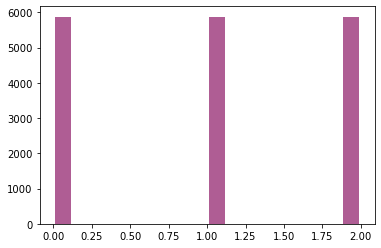

In [45]:
plt.hist(yAd, bins='auto', color='#8E1967', alpha=0.7, rwidth=0.85)

### Divisió del dataset X i y en X_valid, X_trte, y_valid i y_trte
Un 20% del dataset X i y, s'utilitzarà per la validació del model que prediurà el preu dels habitatges de lloguer vacacional. L'altre 80% restant, s'utilitzarà per el train i test. 

In [46]:
from sklearn.model_selection import train_test_split
X_valid, X_trte, y_valid, y_trte = train_test_split(X, yAd, test_size=0.8, random_state=42)

Un 20% del dataset reservat per fer el train i test, s'utilitzarà per testejar el model (X_test i y_test). El 80% restant, s'utilitzarà per l'entrenament (X_train i y_train).

In [47]:
X_test, X_train, y_test, y_train = train_test_split(X_trte, y_trte, test_size=0.8, random_state=42)

## Tractament dels valors NaN de les variables 'bedrooms', 'bathrooms_text', i 'beds'

Com s'ha esmentat anteriorment, les variables bedrooms, bathrooms_text i beds, contenen NaNs que es tracten a aquesta secció.

### NaN de bedrooms

Per tractar els NaNs de la variable bedrooms, s'ha calculat la mitjana dels valors d'aquesta variable per a cadascun dels subconjunts, i s'ha utilitzat la funció fillna() per reemplaçar els nul·ls per aquest valor mitjà. 

Cal esmentar que quan s'executa el tractament de la variable bedrooms, el sistema retorna un warning degut a que no es realitza una còpia del dataframe abans de reemplaçar els valors que són nul. Aquesta còpia no s'ha realitzat, ja que no s'ha considerat necessari; i perquè que en cas de fallada del mètode utilitzat, es pot obtenir fàcilment el dataframe sense els valors reemplaçats.

In [48]:
mitjanaHTe = X_test['bedrooms'].mean()
X_test['bedrooms'] = X_test['bedrooms'].fillna(mitjanaHTe)

mitjanaHTr = X_train['bedrooms'].mean()
X_train['bedrooms'] = X_train['bedrooms'].fillna(mitjanaHTr)

mitjanaHV = X_valid['bedrooms'].mean()
X_valid['bedrooms'] = X_valid['bedrooms'].fillna(mitjanaHV)

C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [49]:
print(X_test['bedrooms'].unique())
print(X_train['bedrooms'].unique())
print(X_valid['bedrooms'].unique())

[ 5.          1.          3.          2.          4.          2.91955267
  9.          6.          7.          8.         20.         12.
 10.         13.         11.        ]
[ 3.         1.         4.         6.         2.         7.
  8.         5.         2.9565335 16.        12.        14.
  9.        10.        40.        18.        13.        33.
 21.        11.       ]
[ 2.          3.          4.          1.          6.          5.
  8.          2.96831797  7.         13.         12.          9.
 10.         32.        ]


### NaN bathrooms_text

Per tractar els NaNs de la variable bathrooms_text, s'ha calculat la mitjana dels valors d'aquesta variable per a cadascun dels subconjunts, i s'ha utilitzat la funció fillna() per reemplaçar els nul·ls per aquest valor mitjà.

Cal esmentar que quan s'executa el tractament de la variable bathrooms_text, el sistema retorna un warning degut a que no es realitza una còpia del dataframe abans de reemplaçar els valors que són nul. Aquesta còpia no s'ha realitzat, ja que no s'ha considerat necessari; i perquè que en cas de fallada del mètode utilitzat, es pot obtenir fàcilment el dataframe sense els valors reemplaçats.

In [50]:
mitjanaBanysTe = X_test['bathrooms_text'].mean()
X_test['bathrooms_text'] = X_test['bathrooms_text'].fillna(mitjanaBanysTe)

mitjanaBanysTr = X_train['bathrooms_text'].mean()
X_train['bathrooms_text'] = X_train['bathrooms_text'].fillna(mitjanaBanysTr)

mitjanaBanysV = X_valid['bathrooms_text'].mean()
X_valid['bathrooms_text'] = X_valid['bathrooms_text'].fillna(mitjanaBanysV)

C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [51]:
print(X_test['bathrooms_text'].unique())
print(X_train['bathrooms_text'].unique())
print(X_valid['bathrooms_text'].unique())

[ 3.5         1.5         3.          4.5         2.          1.
  2.5         5.          4.          5.5         6.5         9.
  0.          7.5         6.          8.         19.         12.5
  7.         12.          2.28287136  8.5        11.        ]
[ 1.5         2.5         1.          3.          2.          4.5
  4.          5.          3.5         6.5         7.          6.
  5.5         8.          0.5        11.          9.          0.
  9.5         7.5        13.         14.         12.          2.28381857
  8.5        10.         12.5        16.        ]
[ 2.        3.        3.5       1.        4.        6.        4.5
  2.5       8.        1.5       7.        5.        6.5       5.5
 10.        0.5       0.       11.        7.5      14.        9.
  2.315625 12.       13.       32.      ]


### NaN beds

Per tractar els NaNs de la variable beds, s'ha calculat la mitjana dels valors d'aquesta variable per a cadascun dels subconjunts, i s'ha utilitzat la funció fillna() per reemplaçar els nul·ls per aquest valor mitjà. 

Cal esmentar que quan s'executa el tractament de la variable beds, el sistema retorna un warning degut a que no es realitza una còpia del dataframe abans de reemplaçar els valors que són nul. Aquesta còpia no s'ha realitzat, ja que no s'ha considerat necessari; i perquè que en cas de fallada del mètode utilitzat, es pot obtenir fàcilment el dataframe sense els valors reemplaçats.

In [52]:
mitjanaLlte = X_test['beds'].mean()
X_test['beds'] = X_test['beds'].fillna(mitjanaLlte)

mitjanaLlTr = X_train['beds'].mean()
X_train['beds'] = X_train['beds'].fillna(mitjanaLlTr)

mitjanLlV = X_valid['beds'].mean()
X_valid['beds'] = X_valid['beds'].fillna(mitjanLlV)

C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [53]:
print(X_test['beds'].unique())
print(X_train['beds'].unique())
print(X_valid['beds'].unique())

[ 7.          0.          5.          3.          4.          2.
  1.          6.          8.          4.34369418  9.         16.
 15.         10.         11.         12.         28.         20.
 14.         13.        ]
[ 4.          5.          1.         10.          3.         11.
 12.          2.          0.          6.          8.          9.
  7.          4.36611681 16.         14.         13.         15.
 32.         21.         29.         18.         22.         17.
 20.         50.         24.         28.         37.        ]
[ 4.          3.          7.          5.          1.          8.
  2.          6.         12.         10.         14.          0.
 15.          4.33914784  9.         11.         13.         22.
 20.         16.         18.         21.         50.        ]


## Normalització de les dades

Per finalitzar el procés de tractament de les dades, s'ha aplicat la funció MinMaxScaler() per normalitzar els valors de cadascun dels datasets: X_train, X_test i X_valid.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

X_train_1 = X_train
X_test_1 = X_test
X_valid_1 = X_valid

X_train = pd.DataFrame(scaler.fit_transform(X_train_1), columns=X_train_1.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test_1), columns=X_test_1.columns)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid_1), columns=X_valid_1.columns)

In [55]:
X_train

noAvailability  yesAvailability  Barn  Boat  Camper/RV  \
0                 0.0              1.0   0.0   0.0        0.0   
1                 0.0              1.0   0.0   0.0        0.0   
2                 0.0              1.0   0.0   0.0        0.0   
3                 0.0              1.0   0.0   0.0        0.0   
4                 0.0              1.0   0.0   0.0        0.0   
...               ...              ...   ...   ...        ...   
11265             0.0              1.0   0.0   0.0        0.0   
11266             0.0              1.0   0.0   0.0        0.0   
11267             0.0              1.0   0.0   0.0        0.0   
11268             0.0              1.0   0.0   0.0        0.0   
11269             0.0              1.0   0.0   0.0        0.0   

       Casa particular  Castle  Cave  Dome house  Earth house  \
0                  0.0     0.0   0.0         0.0          0.0   
1                  0.0     0.0   0.0         0.0          0.0   
2                  0.0     0.0   0.0         0.0          0.0   
3                  0.0     0.0   0.0         0.0          0.0   
4                  0.0     0.0   0.0         0.0          0.0   
...                ...     ...   ...         ...          ...   
11265              0.0     0.0   0.0         0.0          0.0   
11266              0.0     0.0   0.0         0.0          0.0   
11267              0.0     0.0   0.0         0.0          0.0   
11268              0.0     0.0   0.0         0.0          0.0   
11269              0.0     0.0   0.0         0.0          0.0   

       Entire apartment  Entire bed and breakfast  Entire bungalow  \
0                   0.0                       0.0              0.0   
1                   0.0                       0.0              0.0   
2                   0.0                       0.0              0.0   
3                   0.0                       0.0              0.0   
4                   0.0                       0.0              0.0   
...                 ...                       ...              ...   
11265               0.0                       0.0              0.0   
11266               0.0                       0.0              0.0   
11267               0.0                       0.0              0.0   
11268               0.0                       0.0              0.0   
11269               0.0                       0.0              0.0   

       Entire cabin  Entire chalet  Entire condominium  Entire cottage  \
0               0.0            0.0                 0.0             1.0   
1               0.0            0.0                 0.0             0.0   
2               0.0            0.0                 0.0             0.0   
3               0.0            0.0                 0.0             0.0   
4               0.0            0.0                 0.0             0.0   
...             ...            ...                 ...             ...   
11265           0.0            0.0                 0.0             0.0   
11266           0.0            0.0                 0.0             0.0   
11267           0.0            0.0                 0.0             0.0   
11268           0.0            0.0                 0.0             0.0   
11269           0.0            0.0                 0.0             0.0   

       Entire floor  Entire guest suite  Entire guesthouse  Entire house  \
0               0.0                 0.0                0.0           0.0   
1               0.0                 0.0                0.0           0.0   
2               0.0                 0.0                0.0           0.0   
3               0.0                 0.0                0.0           0.0   
4               0.0                 0.0                0.0           0.0   
...             ...                 ...                ...           ...   
11265           0.0                 0.0                0.0           1.0   
11266           0.0                 0.0                0.0           0.0   
11267           0.0            

## Visualització de les variables

### Matriu de correlació

S'ha mirat quina correlació hi ha entre les variables del subconjunt de train, ja que realment és el que s'utilitza per entrenar tots els models. Degut al gran nombre de variables que conté el dataset de train, se n'han seleccionat 13 per elaborar una matriu de correlació.

In [56]:
X_train[['latitude']]

latitude
0      0.609754
1      0.914424
2      0.429503
3      0.505535
4      0.319686
...         ...
11265  0.552539
11266  0.258908
11267  0.820672
11268  0.915792
11269  0.784230

[11270 rows x 1 columns]

In [57]:
dfCorr = X_train[['latitude','longitude','accommodates','bathrooms_text','bedrooms','beds','minimum_nights',
                  'maximum_nights','availability_365','noInstantBookable','yesInstantBookable','noAvailability',
                  'yesAvailability',]]
dfCorr

latitude  longitude  accommodates  bathrooms_text  bedrooms  beds  \
0      0.609754   0.484358        0.3750         0.09375  0.051282  0.08   
1      0.914424   0.588829        0.3750         0.15625  0.051282  0.10   
2      0.429503   0.263769        0.1250         0.06250  0.000000  0.02   
3      0.505535   0.376034        0.1250         0.06250  0.000000  0.02   
4      0.319686   0.110087        0.5000         0.18750  0.076923  0.10   
...         ...        ...           ...             ...       ...   ...   
11265  0.552539   0.677729        0.3750         0.18750  0.051282  0.08   
11266  0.258908   0.715975        1.0000         0.56250  0.179487  0.32   
11267  0.820672   0.572745        0.5000         0.18750  0.076923  0.12   
11268  0.915792   0.593913        0.3125         0.12500  0.051282  0.08   
11269  0.784230   0.686781        0.5000         0.21875  0.076923  0.12   

       minimum_nights  maximum_nights  availability_365  noInstantBookable  \
0            0.010989        0.008288          0.394521                0.0   
1            0.016484        0.321235          0.994521                1.0   
2            0.000000        0.321235          0.997260                0.0   
3            0.000000        0.001715          0.000000                1.0   
4            0.016484        0.321235          0.246575                1.0   
...               ...             ...               ...                ...   
11265        0.000000        0.321235          0.942466                0.0   
11266        0.016484        0.321235          0.980822                0.0   
11267        0.016484        0.321235          0.928767                0.0   
11268        0.000000        0.321235          0.980822                0.0   
11269        0.000000        0.321235          0.695890                0.0   

       yesInstantBookable  noAvailability  yesAvailability  
0                     1.0             0.0              1.0  
1                     0.0             0.0              1.0  
2                     1.0             0.0              1.0  
3                     0.0             0.0              1.0  
4                     0.0             0.0              1.0  
...                   ...             ...              ...  
11265                 1.0             0.0              1.0  
11266                 1.0             0.0              1.0  
11267                 1.0             0.0              1.0  
11268                 1.0             0.0              1.0  
11269                 1.0             0.0              1.0  

[11270 rows x 13 columns]

<AxesSubplot:>

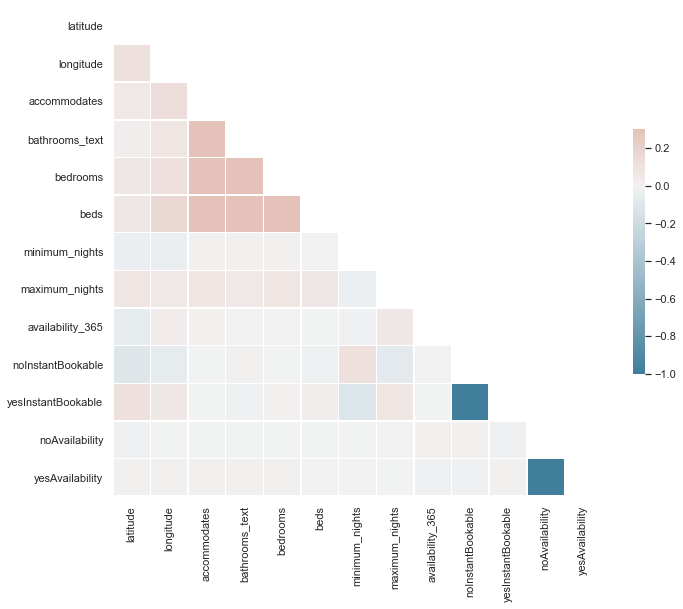

In [58]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = dfCorr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Com es pot observar les variables estan molt poc correlacionades. Pel que sembla, les que presenten un poc més de colinearitat són les relacionades amb els banys, les habitacions i els llits dels que disposa un habitatge. 

### Pairplot

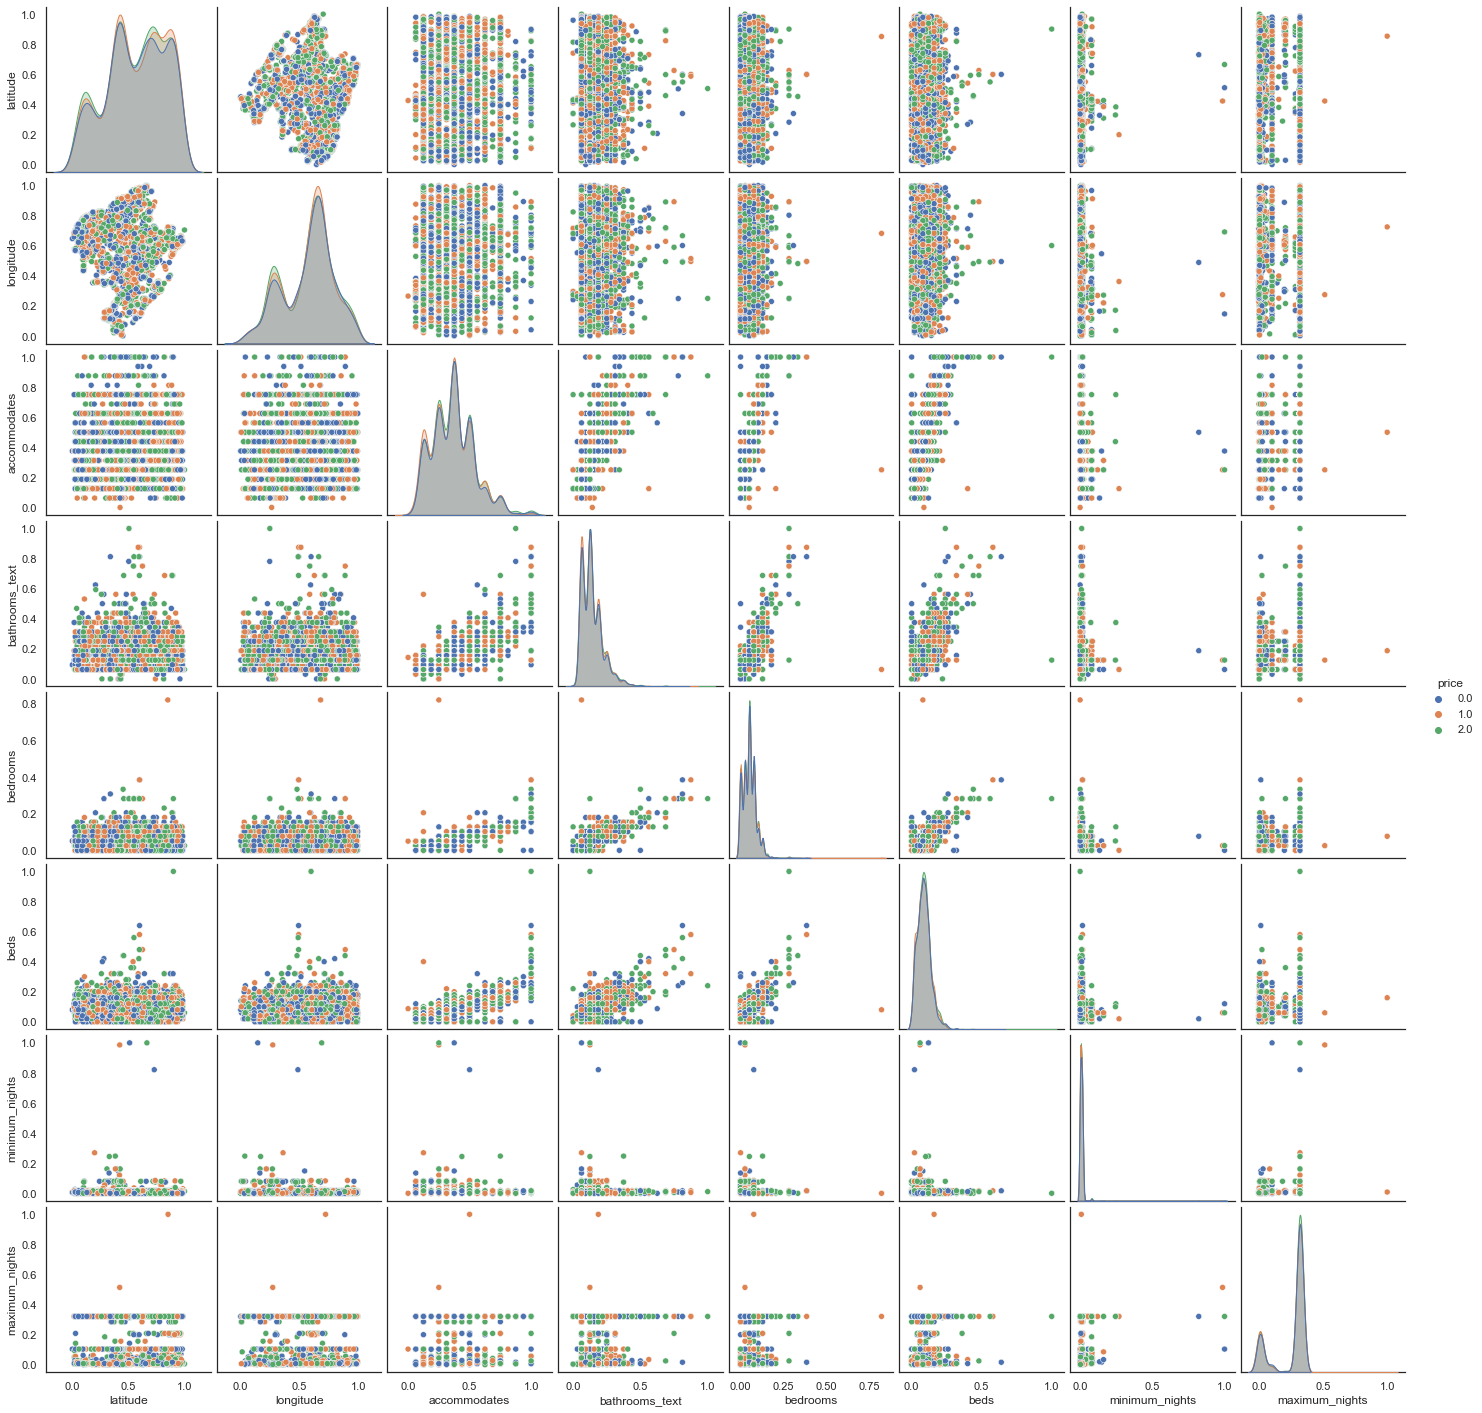

In [59]:
dfPair = X_train[['latitude','longitude','accommodates','bathrooms_text','bedrooms','beds','minimum_nights',
                  'maximum_nights']]
dfPair = pd.concat([dfPair, y_train], axis=1)
dfPair['price'] = dfPair['price'].astype('category')
sns.pairplot(dfPair, hue='price')

El pairplot permet observar que com més habitacions i més llits, més car és el preu/nit d'un allotjament. El mateix passa amb la variable de banys; com més banys i més habitacions, més augmenta el preu/nit. També es pot observar que la majoria dels allotjaments el preu/nit dels quals pertany a la classe 0, estan ubicats a zones de l'interior de mallorca, i molts pocs estan ubicats en zones costaneres.

## Reducció de la dimensionalitat de les dades amb PCA

S'ha intentat reduir el nombre de variables mitjançant l'aplicació de PCA. Al gràfic es pot observar la variança de les dades en funció del nombre de components PCA.

Text(0.5, 1.0, 'Explained Variance')

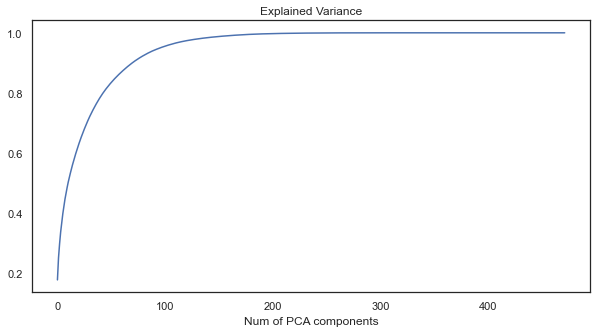

In [60]:
from sklearn.decomposition import PCA

X0 = X_train
y0 = y_train

pca = PCA()

X_pca = pca.fit_transform(X0)
Xdftrain = pd.DataFrame(X_pca)

%matplotlib inline
import matplotlib.pyplot as plt

prova = pca.explained_variance_ratio_.cumsum()
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
ax.plot(prova)
ax.set_xlabel('Num of PCA components')
ax.set_title('Explained Variance')

A partir del gràfic es pot arribar a la conclusió de que amb els 100 primers components del PCA es pot assolir una variança molt propera a 1. S'ha escollit aquest nombre de components, ja que és el que està més aprop del "colze" de la funció representada. 

Tot seguit, s'ha modificat el dataframe d'entrentament, Xdftrain, obtingut després d'aplicar el PCA seleccionant els 100 primers components. S'ha realitzat la mateixa acció pels subconjunts de test i validació, Xdftest i Xdfvalid, respectivament.

In [61]:
Xdftrain = Xdftrain.iloc[:, 0:100]
Xdftrain

0         1         2         3         4         5         6   \
0      2.306948  0.986393 -0.723383 -0.551786 -0.809191 -0.088288  0.613959   
1     -1.477746  0.563658 -0.707944  0.264150  0.607445 -0.937107 -0.503242   
2     -1.856930  0.198044  0.008470 -0.324550 -1.196156 -0.980970 -0.173075   
3     -2.695693 -0.220965  0.812540  0.417830  0.778738 -0.088841  0.786645   
4     -1.807727 -1.022481 -0.663574 -0.291010  1.071210 -0.484105  0.792994   
...         ...       ...       ...       ...       ...       ...       ...   
11265  2.227253  0.460462 -0.284965  0.848341 -0.513312  0.799911 -0.271007   
11266 -0.288062 -0.832506 -1.229557 -1.348227  0.374165  1.182542 -0.987379   
11267  1.932385  0.982619 -1.100166  0.431100 -1.047044  0.343241  0.435223   
11268  0.646922 -1.435188  0.320096  1.533363 -1.153562 -0.786190 -0.334225   
11269  2.681910  0.052330 -0.431932 -0.963521 -0.269489 -0.026250 -0.635063   

             7         8         9         10        11        12        13  \
0      0.038745 -0.760417  0.761744 -0.209153  0.009772  0.236226 -1.001912   
1     -0.024480 -0.251117  0.096361 -0.047232 -0.592114 -0.559543 -0.077870   
2      0.578696  0.361984 -0.177755  0.065964 -0.044941 -0.240296 -0.359050   
3      1.102830 -0.509986 -0.129574 -0.235713 -0.240688 -0.492342  0.116352   
4      0.263858  0.143575 -0.091961  0.326767  0.102947 -0.589610  0.384844   
...         ...       ...       ...       ...       ...       ...       ...   
11265 -0.328842  0.716602  0.042279 -0.406539  0.035052 -0.488550  0.635405   
11266 -0.072412  0.268870  0.788530  0.742260 -0.104405 -0.703418  0.357120   
11267 -0.426644 -0.558582  0.713629  0.150789 -0.629411  0.092073 -0.796066   
11268 -0.326445  0.415081 -0.325034  0.312901 -0.104565  0.021895  0.769708   
11269  0.254095 -0.292599 -0.526029 -0.092511  0.250592 -0.613742  0.481206   

             14        15        16        17        18        19        20  \
0      0.372949 -0.442164 -0.459249 -0.601991  0.271589 -0.049179 -0.165552   
1      0.906459  0.338029  0.641421 -0.997089  0.290142 -0.534216 -0.230282   
2     -0.428538 -0.406540 -1.000907 -0.451556 -0.572494  0.196257  0.631341   
3     -0.281045  0.031167  0.036508 -0.045532 -0.210925 -0.126714  0.028497   
4      0.562175  0.817006  0.559653 -0.408912 -0.350443 -0.595744 -0.038128   
...         ...       ...       ...       ...       ...       ...       ...   
11265 -0.057772  0.661013  0.198781 -0.477843  0.297044 -0.618182  0.134845   
11266  0.146571  0.245465 -0.071597  0.235478 -0.213576 -0.275757  0.088132   
11267  0.423102 -0.405842  0.277079 -0.237982 -0.214037  0.247089  0.638193   
11268 -0.645370  0.116634 -0.381340 -0.191305 -0.260818  0.243445  0.353291   
11269 -0.831699 -0.330077 -0.119794 -0.444860 -0.148961  0.151340 -0.111333   

             21        22        23        24        25        26        27  \
0      0.023860 -0.945234  0.473157  0.084954 -0.016340  0.434912 -0.170635   
1     -0.280897  0.027553  0.360008 -0.092865 -0.269091  0.279299 -1.145590   
2      0.571006 -0.341889  0.534268 -0.191066  0.072249 -0.671148 -0.070533   
3      0.377196 -0.034027  0.369397 -0.152400  0.161402  0.219907  0.248820   
4     -0.351442  0.072526 -0.121729 -0.155870 -0.201605 -0.065727  0.662125   
...         ...       ...       ...       ...       ...       ...       ...   
11265  0.441783 -0.023220 -0.202684 -0.594658 -0.098258 -0.007918 -0.050837   
11266  0.433272  0.289595 -0.151491  0.144483 -0.042011 -0.097382  0.184986   
11267  0.049835 -0.659676 -0.233856 -0.606626 -0.023921  0.247007 -0.168620   
11268 -0.382826 -0.196539 -0.014076  0.324859 -0.003920  0.625940 -0.059093   
11269  0.235759  0.292783 -0.311437 -0.114452  0.553133  0.576200  0.017234   

             28        29        30        31        32        33        34  \
0      0.059428  0.491181  0.523678  0.327190  0.103019  0.084442  0.209146   
1      0.457852 -0.188353  0.116250 -0.380513  0.473754 -0.

In [62]:
Xtest_pca = pca.transform(X_test)
Xdftest = pd.DataFrame(Xtest_pca)
Xdftest = Xdftest.iloc[:, 0:100]
Xdftest

0         1         2         3         4         5         6   \
0     1.634179 -2.093170  0.320069 -0.224405  0.348855 -0.216902 -0.168985   
1    -0.881780  0.073956  1.887673  0.328435  1.106438  0.651689  1.800101   
2    -1.323927 -1.582097 -0.635147 -0.627889 -0.455126 -1.145316 -0.909750   
3     1.876569 -0.465547 -0.883554 -0.406472  1.556118 -0.057131  0.022701   
4     2.058458  0.430164 -0.606112  0.240511  1.064761 -0.136818 -0.176771   
...        ...       ...       ...       ...       ...       ...       ...   
2812 -1.249520  0.163838  0.870753 -0.595442 -0.156950  0.836212 -1.146158   
2813 -2.235257 -0.636737 -0.489058  0.805527 -0.677403  0.126710 -0.254075   
2814 -0.744264 -1.925092  0.503584 -0.316182 -0.360526 -0.230867  1.623259   
2815 -2.061616  0.340158 -0.301257 -0.478597 -0.358792  0.119126 -0.486050   
2816  1.156101 -0.838185 -0.097364 -0.549395  0.017045  0.401104 -0.244572   

            7         8         9         10        11        12        13  \
0     0.328569  0.310670  0.005991  0.533605 -0.251657 -0.462163 -0.311375   
1     0.630704 -0.405718  0.107501  0.191397 -0.293461  0.087716 -0.032437   
2    -0.230812 -0.240187 -1.010421  0.497567 -0.583168  0.237067 -0.209026   
3    -0.119364  0.322200  0.366851  0.596225  0.611030 -0.217281 -0.216210   
4     0.267433 -0.142786  1.181158 -0.614897  0.553400  0.112416  0.256143   
...        ...       ...       ...       ...       ...       ...       ...   
2812 -0.061982 -0.691873  1.087880  0.658256  0.001397  0.540564  0.236002   
2813 -0.066201  0.524863  0.269735  0.893877 -0.348234 -0.023149 -0.492224   
2814  0.325201 -0.077349 -0.303450 -0.317860  0.232138 -0.692774 -0.214254   
2815  0.613121  0.529329  0.337429  0.163467 -0.338631  0.589407  0.326860   
2816  0.055593 -0.252628 -0.961926 -0.851039 -0.044503 -1.134984  0.604359   

            14        15        16        17        18        19        20  \
0    -0.535703 -0.272814  0.384845  0.097234  0.093270  0.404201 -0.023975   
1    -0.062142 -0.160323  0.104973 -0.372556  0.159396  0.113667  0.019782   
2    -0.598862 -0.126427  0.256549 -0.056527  0.404693  0.313321 -0.187269   
3     0.512398  0.213222 -0.025964  0.251860  0.115876 -0.049146 -0.022359   
4    -0.182341  0.329053 -0.379664 -0.793163  0.156944 -0.154164 -0.637844   
...        ...       ...       ...       ...       ...       ...       ...   
2812  0.249443  0.045451 -0.119340 -0.420839 -0.093977  0.258248  0.687718   
2813 -0.400801 -0.344651  0.256680 -0.416600 -0.488252 -0.155707 -0.865527   
2814 -0.322662 -0.504283  0.249284 -0.180742 -0.155901 -0.163664 -0.554533   
2815  0.262502 -0.190843 -0.055144  0.179484  0.490645 -0.080623 -0.652991   
2816  0.282381 -0.104383  0.769411 -0.032886  0.029209  0.154343 -0.066232   

            21        22        23        24        25        26        27  \
0    -0.069550  0.005811  0.272250  0.253678  0.015824 -0.119847 -0.307225   
1     0.470371  0.151353  0.008492  0.088879  0.578544  0.107033 -0.517662   
2    -0.130537  0.131850  0.368027 -0.105941 -0.287974  0.424875 -0.159373   
3     0.506669 -0.373679  0.017074 -0.419823  0.317193 -0.443315 -0.094249   
4     1.033535 -0.468670  0.349638 -0.173983 -0.139386 -0.095274 -0.449912   
...        ...       ...       ...       ...       ...       ...       ...   
2812 -0.092601  0.427117  0.435959 -0.125595 -0.641934  0.047427  0.113105   
2813  0.373758  0.401934 -0.239198 -0.201132  0.114705 -0.001174 -0.090468   
2814 -0.661898  0.071539 -0.850269  0.148596 -0.235596  0.052585 -0.201220   
2815  0.440056  0.616737 -0.168143  0.173859 -0.272238 -0.121684  0.091216   
2816 -0.327508 -0.113703 -0.708983  0.286409  0.165820 -0.271214  0.071174   

            28        29        30        31        32        33        34  \
0    -0.092189  0.238060  0.296932 -0.283817 -0.499379 -0.208609  0.240454   
1    -0.469454 -0.906970  0.403881  0.205880  0.156736 -0.082085 -0.117124   
2     0.241831 -0.308891 -0.11

In [63]:
Xvalid_pca = pca.transform(X_valid)
Xdfvalid = pd.DataFrame(Xvalid_pca)
Xdfvalid = Xdfvalid.iloc[:, 0:100]
Xdfvalid

0         1         2         3         4         5         6   \
0     1.775454  1.065317  1.094998 -0.586783 -1.179936 -0.680342 -0.000186   
1    -2.271327 -0.653428 -0.475805  0.881871 -0.592473  0.243993 -0.196827   
2     1.334359 -0.503690 -0.594694  1.622783  1.051168  0.560906 -0.168118   
3    -2.334019  0.113239 -0.661752  1.045783  0.504916 -0.055203 -0.114227   
4     1.066614  0.828372  0.264953 -0.228124 -0.267894 -0.198248 -1.031395   
...        ...       ...       ...       ...       ...       ...       ...   
3516 -0.531616 -0.500743 -0.252908  0.756418 -0.728735  0.949589  0.765202   
3517 -1.346317  0.180990 -0.451169  0.494167 -0.200002  1.908791 -0.472678   
3518  2.004856  0.321482  0.802512 -0.175885 -0.377400  0.403656 -0.825404   
3519  1.718370  1.315514  0.776351 -0.520425 -1.256360 -0.632985  0.559963   
3520 -2.627350 -0.492641  0.952600  0.151339 -0.514461  0.148240  0.676642   

            7         8         9         10        11        12        13  \
0    -1.174828 -0.577878 -0.046636  0.077939 -0.012465 -0.163071 -0.332178   
1     0.220889  0.135149  0.289002  0.707903 -0.286344  0.277055 -0.510938   
2     0.144377 -0.290632  0.799683  0.232814  0.311347 -0.553296 -0.317713   
3    -0.584621  0.322729  0.045063  0.357627 -0.237338 -0.167371 -0.023029   
4     0.417197  0.365412 -0.905561  0.179406  0.381399 -0.362639 -0.270791   
...        ...       ...       ...       ...       ...       ...       ...   
3516 -1.287293  0.781372 -0.561199 -0.069199  0.122004  0.506976 -0.123434   
3517 -0.125088 -0.187719  0.504038  0.262122 -0.291840 -0.598064 -0.114665   
3518 -0.471357 -0.317489 -0.002929 -0.025291  1.170842  0.247852  0.228120   
3519 -0.091288 -0.366261 -0.779227  0.517071 -0.844960  0.003947 -0.269399   
3520  1.534965 -0.224873 -0.125429 -0.461182 -0.209385 -0.367147 -0.013753   

            14        15        16        17        18        19        20  \
0    -0.088376  0.032328  0.495537  0.087694 -0.149069  0.742429  0.490669   
1    -0.523234 -0.159674  0.364747 -0.266859 -0.556959  0.151072 -0.868165   
2    -0.018580  0.357373 -0.086381  0.039261  0.329908  0.650200  0.003919   
3    -0.428982 -0.501806 -0.012691 -0.128663  0.167645 -0.034742 -0.178680   
4    -0.013161 -0.438399  0.300222  1.062001  0.484562  0.131932 -0.092005   
...        ...       ...       ...       ...       ...       ...       ...   
3516 -0.084511 -0.012257  0.340004 -0.393229  0.753494 -0.245537  0.120244   
3517 -0.090342  0.340623  0.079647  0.382458  0.452245  0.213335  0.128268   
3518  0.245714  1.063441 -0.171439 -0.088178 -0.286101 -0.809039 -0.269538   
3519 -0.236672  0.282758 -0.774788 -0.287145  0.414452  0.088410  0.025426   
3520 -0.175779 -0.053739 -0.036547  0.160675 -0.054032 -0.215877 -0.099959   

            21        22        23        24        25        26        27  \
0     0.604114 -0.717829  0.354285 -0.117689 -0.233557 -0.503096  0.420222   
1     0.785924  0.680956 -0.082429 -0.166207 -0.149666  0.083802  0.004723   
2     0.062346 -0.102803  0.279820  0.132172 -0.160868 -0.255367 -0.142888   
3    -0.191521  0.223166 -0.437811  0.233157 -0.104767  0.359314 -0.329164   
4    -0.047827  0.464544  0.752322  0.568257  0.635128  0.037882  0.104768   
...        ...       ...       ...       ...       ...       ...       ...   
3516 -0.417976 -0.261759  0.073113  0.377609 -0.062670  0.355467  0.765042   
3517  0.205508  0.732574 -0.119285  0.362797 -0.416427  0.540206 -0.831555   
3518  0.344337 -0.528667 -0.261170 -0.281895  0.258418 -0.271964 -0.279387   
3519  0.455296 -0.126966  0.033866  0.383599 -0.283552 -0.583045 -0.032961   
3520  0.133613  0.353107  0.133493 -0.294104  0.482785 -0.117381  0.452965   

            28        29        30        31        32        33        34  \
0    -0.818771 -0.109313  0.243119  0.016871 -0.115767  0.579080  0.198075   
1     0.234838  0.372687  0.056096  0.043338  0.054073  0.341684 -0.004515   
2     0.005389 -0.239952 -0.21

## Models de classificació

L'objectiu és determinar a dins quin dels rangs predefinits i descrits anteriorment es situa el preu de cadascun dels allotjaments del conjunt de dades en funció del preu predit.

### Regressió logística

#### Sense PCA

Per determinar els paràmetres amb els que el model de regressió logística era capaç d'obtenir un millor accuracy, s'ha utilitzat la funció GridSearch. Tot i així, es pot observar que el sistema retorna un warning, ja que el model no és capaç de convergir.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'max_iter':[100, 200, 300, 500], 'random_state':[5, 10, 15, 20]}

logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters, n_jobs=-1)
sortidaLR = clf.fit(X_train, y_train)

C:\Users\Maria Monserrat\anaconda3\envs\ds-uib\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Consultant els best_params, s'ha determinat que el model aconsegueix el millor accuracy quan té definit com a màxim 200 iteracions, i un random_state=5.

In [65]:
sortidaLR.best_params_

{'max_iter': 200, 'random_state': 5}

In [66]:
pred = sortidaLR.predict(X_test)
pred

array([2., 0., 2., ..., 2., 0., 1.])

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, pred)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, pred, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, pred, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6414625488107917

El recall obtingut és de: 
0.6414625488107917

L'f1-score calculat és de: 
0.6395892201559193


Com ja s'ha comentat, el model de regressió logística no pot convergir. Tot i així, amb 200 iteracions i random_state=5, l'accuracy obtingut amb aquest primer model és de 0.6415. Per altra part, el recall permet determinar que amb una proporció de 0.6415 el model és capaç de trobar "true positives". Finalment, amb l'f1-score obtingut és de 0.6396. 

#### Amb PCA

In [68]:
from sklearn.linear_model import LogisticRegression

parameters = {'max_iter':[100, 200, 300, 500], 'random_state':[5, 10, 15, 20]}

logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters, n_jobs=-1)
sortidaLR = clf.fit(Xdftrain, y_train)

In [69]:
sortidaLR.best_params_

{'max_iter': 100, 'random_state': 5}

In [70]:
pred = sortidaLR.predict(Xdftest)
pred

array([2., 0., 2., ..., 2., 0., 1.])

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, pred)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, pred, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, pred, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6762513312034079

El recall obtingut és de: 
0.6762513312034079

L'f1-score calculat és de: 
0.6743413295239186


Com es pot observar, el rendiment del model de Regressió Logística utilitzant PCA és més alt que si s'entrena amb dades sense reduir. En particular, els valors d'accuracy i recall assolits són un 3.48% superiors que si s'utilitzen les dades sense aplicar PCA. Pel que fa al valor d'f1-score, l'obtingut utilitzant PCA és un 3.04% superior que si no s'utilitza PCA.

Per tant, amb aquest model de Regressió Logística, s'obté un millor rendiment si s'aplica PCA a les dades.

### Arbres de decisió

#### Sense PCA

Per determinar els paràmetres amb els que el model Decision Tree era capaç d'obtenir un millor rendiment, s'ha utilitzat la funció GridSearch. S'han modificat els paràmetres: max_depth i random_state.

In [72]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10, 70, 100, 150, 300], 'random_state':[5, 10, 15, 20, 25]}
tree = tree.DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 70, 100, 150, 300],
                         'random_state': [5, 10, 15, 20, 25]})

Consultant els best_params, s'ha determinat que el model obté el millor accuracy quan la profunditat màxima de l'arbre és 10 i el random_state=5.

In [73]:
clf.best_params_

{'max_depth': 10, 'random_state': 5}

In [74]:
predA = clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predA)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predA, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predA, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.5839545615903443

El recall obtingut és de: 
0.5839545615903443

L'f1-score calculat és de: 
0.5699890589822665


Com es pot observar, l'accuracy obtingut mitjançant els arbres de decisió és lleugerament inferior a l'obtingut amb el model de regressió logística utilitzant PCA, 0.5840; per tant, el valor obtingut és un 9.23% inferior. El recall obtingut mitjançant aquest nou model és de 0.5840, també un 9.23% inferior que el valor la regressió logística amb PCA. Per altra banda, l'f1-score presenta una variació negativa de l'10.43% respecte al valor obtingut mitjançant el model anterior.

#### Amb PCA

In [76]:
from sklearn import tree
from sklearn.tree import export_text

parameters = {'max_depth':[10, 70, 100, 150, 300], 'random_state':[5, 10, 15, 20, 25]}
tree = tree.DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, n_jobs=-1)
clf.fit(Xdftrain, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 70, 100, 150, 300],
                         'random_state': [5, 10, 15, 20, 25]})

In [77]:
clf.best_params_

{'max_depth': 10, 'random_state': 10}

In [78]:
predA = clf.predict(Xdftest)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predA)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predA, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predA, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.5832445864394746

El recall obtingut és de: 
0.5832445864394746

L'f1-score calculat és de: 
0.5854012615451468


Els resultats obtinguts aplicant el model Decision Tree amb PCA són pràcticament iguals que els obtinguts si s'utilitzen les dades sense haver-hi aplicat PCA. Simplement hi ha una petita variació negativa del 0.08% entre l'accuracy i el recall obtingut amb en Decision Tree amb PCA i sense PCA. Cal esmentar que l'f1-score obtingut amb el Decision Tree amb PCA és un 1.54% superior que el valor obtingut sense PCA.

En el cas del Decision Tree, s'obtenen millors resultats sense PCA.

### Random forest

#### Sense PCA

Per determinar els paràmetres amb els que el model Random Forest era capaç d'obtenir un millor rendiment, s'ha utilitzat la funció GridSearch.

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10, 25, 50, 100, 300], 'random_state':[5, 10, 15, 20, 25]}
randomF = RandomForestClassifier()
clfF = GridSearchCV(randomF, parameters, n_jobs=-1)
clfF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 25, 50, 100, 300],
                         'random_state': [5, 10, 15, 20, 25]})

Consultant els best_params, s'ha determinat que el model obté el millor accuracy quan la profunditat màxima de l'arbre és 25 i el random_state=5.

In [81]:
clfF.best_params_

{'max_depth': 25, 'random_state': 5}

In [82]:
predRand = clfF.predict(X_test)
print(predRand)

[2. 0. 2. ... 2. 0. 1.]


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predRand)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predRand, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predRand, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6996805111821086

El recall obtingut és de: 
0.6996805111821086

L'f1-score calculat és de: 
0.693507875866224


El valor d'accuracy obtingut amb el Random Forest és de 0.6997. Això suposa un increment del 2.34% respecte de l'accuracy obtingut amb el model de Regressió Logística amb PCA; i un increment del 11.57% respecte del valor d'accuracy obtingut amb el model d'arbre de decisió sense PCA.

El recall calculat amb el model Random Forest, 0.6997, és major que el valor obtingut amb els altres models anteriors. El recall del Random Forest és un 2.34% superior que l'obtingut amb el model de Regressió Logística amb PCA, i 11.57% superior respecte del valor obtingut amb el model d'arbre de decisió sense PCA.

Finalment, l'f1-score obtingut amb el Random Forest és del 0.6935. Es pot dir que l'f1-score del Random Forest és un 1.92% superior que el valor obtingut amb el model de Regressió Logística amb PCA, i un 12.35% major que el valor obtingut amb l'arbre de decisió sense PCA.

#### Amb PCA

In [84]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth':[10, 25, 50, 100, 300], 'random_state':[5, 10, 15, 20, 25]}
randomF = RandomForestClassifier()
clf = GridSearchCV(randomF, parameters, n_jobs=-1)
clf.fit(Xdftrain, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 25, 50, 100, 300],
                         'random_state': [5, 10, 15, 20, 25]})

In [85]:
clf.best_params_

{'max_depth': 50, 'random_state': 10}

In [87]:
predRand = clf.predict(Xdftest)
print(predRand)

[2. 0. 1. ... 2. 0. 1.]


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predRand)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predRand, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predRand, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.665956691515797

El recall obtingut és de: 
0.665956691515797

L'f1-score calculat és de: 
0.6607830866669812


Els resultats obtinguts aplicant PCA són pitjors que els que s'obtenen amb les dades que no han estat tractades amb el PCA.

L'accuracy obtingut amb PCA és de 0.6660, un 3.37% inferiors que les dades obtingudes amb el Random Forest sense PCA. El valor de recall obtingut amb el Random Forest amb PCA és de 0.6660, un valor 3.37% inferior que el rendiment obtingut sense PCA i utilitzant el mateix model. Pel que fa la mètrica f1-score, el valor obtingut amb PCA és de 0.6608, un 3.27% inferior que el valor obtingut sense PCA.

Per tant, en aquest cas, el model Random Forest sense PCA és el que permet obtenir un millor rendiment.

### Preceptró

#### Sense PCA

In [89]:
from sklearn.linear_model import Perceptron

clf_p = Perceptron(tol=1e-3)
clf_p = clf_p.fit(X_train, y_train)
predPer = clf_p.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predPer)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predPer, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predPer, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6222932197373092

El recall obtingut és de: 
0.6222932197373092

L'f1-score calculat és de: 
0.6216330298434959


Com es pot observar, l'accuracy obtingut amb el perceptró sense PCA és de 0.6223. Això suposa un decrement del 7.74% respecte del valor obtingut amb el model Random Forest sense PCA. Pel que fa al recall, el valor aconseguit amb el perceptró sense PCA també un 7.74% inferior. Finalment, l'f1-score calculat és 0.6216, la qual cosa suposa un increment negatiu d'un 7.19% respecte del valor obtingut amb el Random Forest sense PCA.  

#### Amb PCA

In [91]:
from sklearn.linear_model import Perceptron

clf_p = Perceptron(tol=1e-3)
clf_p = clf_p.fit(Xdftrain, y_train)
predPer = clf_p.predict(Xdftest)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, predPer)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_test, predPer, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_test, predPer, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6088036918707845

El recall obtingut és de: 
0.6088036918707845

L'f1-score calculat és de: 
0.6038774741079491


Els resultats obtinguts amb el perceptró amb PCA són pitjors que si no s'aplica el PCA. En aquest cas, l'accuracy obtingut amb el perceptró amb PCA és de 0.6088, un 1.35% inferior respecte al mateix model sense PCA. El recall, també es de 0.6088, un 1.35% inferior respecte al perceptró sense PCA. Finalment, l'f1-score és de 0.6039, un 1.77% inferior que si s'aplica PCA.

### Conclusió del millor model

A partir de les mètriques de rendiment calculades, es pot concloure que el millor model és el Random Forest sense PCA, amb una profunditat màxima dels arbres de 25 nivells i un random_state de 5. El valor obtingut amb aquest model és considerablement alt, i es considera que és un valor d'accuracy acceptable.

In [119]:
labels = ['Regr.Logística', 'Decision Tree', 'Random Forest', 'Perceptró']
accuracySense = [0.6415, 0.5840, 0.6997, 0.6223]
accuracy = [0.6763, 0.5832, 0.6660, 0.6088]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracySense, width, label='Accuracy sense PCA', color='#8FCD28')
rects2 = ax.bar(x + width/2, accuracy, width, label='Accuracy amb PCA', color='#2887CD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Resultats de l'accuracy pel model de Regressió Logística")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower left')

Al gràfic es pot observar visualment, que l'accuracy obtingut amb el model Random Forest sense PCA és el més alt, ja que s'assoleix un valor de quasi el 70%. Per tant, el model Random Forest sense PCA, amb una màxima profunditat de 25 nivells i un random_state=5, serà el que s'utilitzarà per predir el preu dels allotjaments del conjunt de dades de validació.

#### Execució amb el conjunt de dades de validació

In [106]:
from sklearn.ensemble import RandomForestClassifier

predV = clfF.predict(X_valid)

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, predV)
print("L'accuracy obtingut és de: ")
print(accuracy)
print()
recall = recall_score(y_valid, predV, average='weighted')
print("El recall obtingut és de: ")
print(recall)
print()
f1 = f1_score(y_valid, predV, average='weighted')
print("L'f1-score calculat és de: ")
print(f1)

L'accuracy obtingut és de: 
0.6924169270093723

El recall obtingut és de: 
0.6924169270093723

L'f1-score calculat és de: 
0.6903410396250611


El valor d'accuracy obtingut executant el conjunt de dades de validació és de 0.6924, amb un recall de 0.6924 i un f1-score de 0.6903. 

Al següent gràfic es pot observar la diferència entre els resultats de les mètriques quan es prediuen els preus dels allotjaments del conjunt de dades de test o de validació.

In [118]:
labels = ['Random Forest', 'Random Forest Validació']
accuracy = [0.6997, 0.6924]
f1 = [0.6935, 0.6903]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='#8FCD28')
rects2 = ax.bar(x + width/2, f1, width, label='F1-score', color='#2887CD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Comparació dels resultats obtinguts amb el conjunt de test i validació")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

Com es pot observar, els valors obtinguts són gairebé iguals, tot i que els obtinguts amb el conjunt de validació són un poc inferiors als obtinguts amb el conjunt de test. 

## Conclusions
Amb la pràctica s'ha observat que aplicant models d'Aprenentatge Automàtic i els conceptes explicats durant les sessions teòriques, es poden tractar les dades, interpretar-les, i elaborar models per fer prediccions del preu dels allotjaments que hi ha disponibles a la plataforma Airbnb. 

Tot i que el rendiment dels models podria ser millor, el fet d'utilitzar un conjunt de dades real ha permès endinsar-nos dins el món de treballar amb dades sense tractar. A nivell personal, m'ha servit per descobrir, valorar la gran utilitat dels models d'aprenentatge automàtic, i per experimentar una petita part del que es pot trobar al món professional.